<h1>Here we aim to use NLP, Random forest Classifier, XgBoost, Logistic Regression, Deep lerning LSTM to evaluate their performance on product recommenation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/grammar-and-online-product-reviews/GrammarandProductReviews.csv


<h2>importing the required libraries a.k.a Housekeeping<h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina'] #include it if you have high denisty retina display
import seaborn as sns #as it gives 2x plots with matplotlib and ipython notebook
import plotly.offline as py #to drew plotly
color = sns.color_palette()#graphs from a 
import plotly.offline as py#command line
py.init_notebook_mode(connected=True) #to create offine grapgs with notebook
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.metrics import confusion_matrix, classification_report



Populating the interactive namespace from numpy and matplotlib


In [3]:
# change dir according to your dataset location
dir = '/kaggle/input/grammar-and-online-product-reviews/GrammarandProductReviews.csv'
df = pd.read_csv(dir)
df.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories             dateAdded  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...  2017-07-25T00:52:42Z   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   

            dateUpdated          ean  \
0  2018-02-05T08:36:58Z  6.02537E+11   
1  2018-02-05T11:27:45Z  73416000391   
2  2018-02-05T11:27:45Z  73416000391   
3  2018-02-05T11:25:51Z  67981934427   
4  2018-02-05T11:25:51Z  67981934427   

                                                keys  \
0  602537205981,universalmusic/14331328,universal...   
1  lundbergorganiccinnamontoastricecakes/b000fvzw...   
2  lundbergorganiccinnamontoastricecakes/b000fvzw...   
3  kylovesensualitypleasuregel/b00u2whx8s,0679819...   
4  kylovesensualitypleasuregel/b00u2whx8s,0679819...   

                         manufacturer manufacturerNumber  \
0  Universal Music Group / Cash Money           14331328   
1                            Lundberg             574764   
2                            Lundberg             574764   
3                                 K-Y        67981934427   
4                                 K-Y        67981934427   

                                         name  ...   reviews.id  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  ...          NaN   
1  Lundberg Organic Cinnamon Toast Rice Cakes  ...  100209113.0   
2  Lundberg Organic Cinnamon Toast Rice Cakes  ...  100209113.0   
3            K-Y Love Sensuality Pleasure Gel  ...  113026909.0   
4            K-Y Love Sensuality Pleasure Gel  ...  171267657.0   

  reviews.numHelpful reviews.rating  \
0                0.0              5   
1                NaN              5   
2                NaN              5   
3                NaN              1   
4                NaN              1   

                                  reviews.sourceURLs  \
0  https://redsky.target.com/groot-domain-api/v1/...   
1   https://www.walmart.com/reviews/product/29775278   
2   https://www.walmart.com/reviews/product/29775278   
3   https://www.walmart.com/reviews/product/43383370   
4   https://www.walmart.com/reviews/product/43383370   

                                        reviews.text  reviews.title  \
0  i love this album. it's very good. more to the...   Just Awesome   
1  Good flavor. This review was collected as part...           Good   
2                                       Good flavor.           Good   
3  I read through the reviews on here before look...   Disappointed   
4  My husband bought this gel for us. The gel cau...     Irritation   

   reviews.userCity  reviews.userProvince reviews.username          upc  
0       Los Angeles                   NaN           Joshua  6.02537E+11  
1               NaN                   NaN        Dorothy W  73416000391  
2               NaN                   NaN        Dorothy W  73416000391  
3               NaN                   NaN          Rebecca  67981934427  
4               NaN                   NaN        Walker557  67981934427  

[5 rows x 25 columns]

<h2>EDA and Data PreProcessing a.k.a Feature engineering<h2>

In [4]:
#data overivew
print('rows: ', df.shape[0])
print('columns: ', df.shape[1])
print('\nfeatures: ', df.columns.to_list())
print('\nmissing vlues: ', df.isnull().values.sum())
print('\nUnique values: \n', df.nunique())

rows:  71044
columns:  25

features:  ['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys', 'manufacturer', 'manufacturerNumber', 'name', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc']

missing vlues:  296152

Unique values: 
 id                        600
brand                     392
categories                581
dateAdded                 598
dateUpdated               354
ean                       473
keys                      600
manufacturer              463
manufacturerNumber        583
name                      600
reviews.date            13789
reviews.dateAdded        3199
reviews.dateSeen        17469
reviews.didPurchase         2
reviews.doRecommend         2
reviews.id              31374
reviews.numHelpful         72
reviews.

In [5]:
#see the data types of different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
id                      71044 non-null object
brand                   71044 non-null object
categories              71044 non-null object
dateAdded               71044 non-null object
dateUpdated             71044 non-null object
ean                     39065 non-null object
keys                    71044 non-null object
manufacturer            70903 non-null object
manufacturerNumber      70841 non-null object
name                    71044 non-null object
reviews.date            70977 non-null object
reviews.dateAdded       71044 non-null object
reviews.dateSeen        71044 non-null object
reviews.didPurchase     32158 non-null object
reviews.doRecommend     60429 non-null object
reviews.id              32158 non-null float64
reviews.numHelpful      32508 non-null float64
reviews.rating          71044 non-null int64
reviews.sourceURLs      71044 non-null object
reviews.text    

In [6]:
#see the sum of missing values in each columns
df.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

In [7]:
#drop the rows having null values for reviews text
df = df.dropna(subset=['reviews.text'])

In [8]:
#there are many duplicate reveiws (exact same comments in review.text)
#but I am not going to clean the data yet,so i just use the data as it is, to go through t process
df['reviews.text'].value_counts()[10:50]

Yummy                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      5
Works great                                                                                                                                                                                                                                                                                                

<h2> How are the ratings distributed<h2>

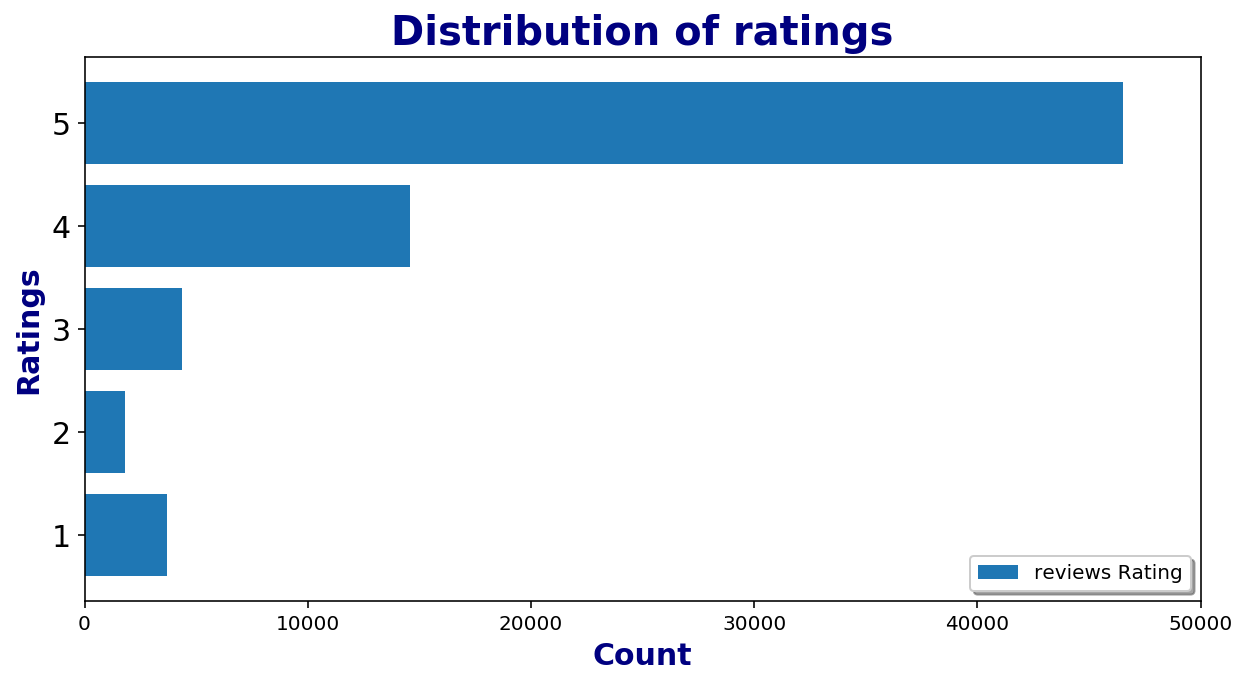

In [9]:
#plot ratings frequency
plt.figure(figsize=[10,5]) #[width, height]
x = list(df['reviews.rating'].value_counts().index)
y = list(df['reviews.rating'].value_counts())
plt.barh(x, y)

ticks_x = np.linspace(0, 50000, 6) # (start, end, no of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks(size=15)

plt.title('Distribution of ratings', fontsize=20, weight='bold', color='navy', loc='center')
plt.xlabel('Count', fontsize=15, weight='bold', color='navy')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='navy')
plt.legend(['reviews Rating'], shadow=True, loc=4)
#Loc =1 topright, loc=2 topleft, loc=3 bottomleft, loc=4 bottom right, loc=9 topmiddle
#plt.grid() #add grid lines

<h2>what words do people use in their reviews?


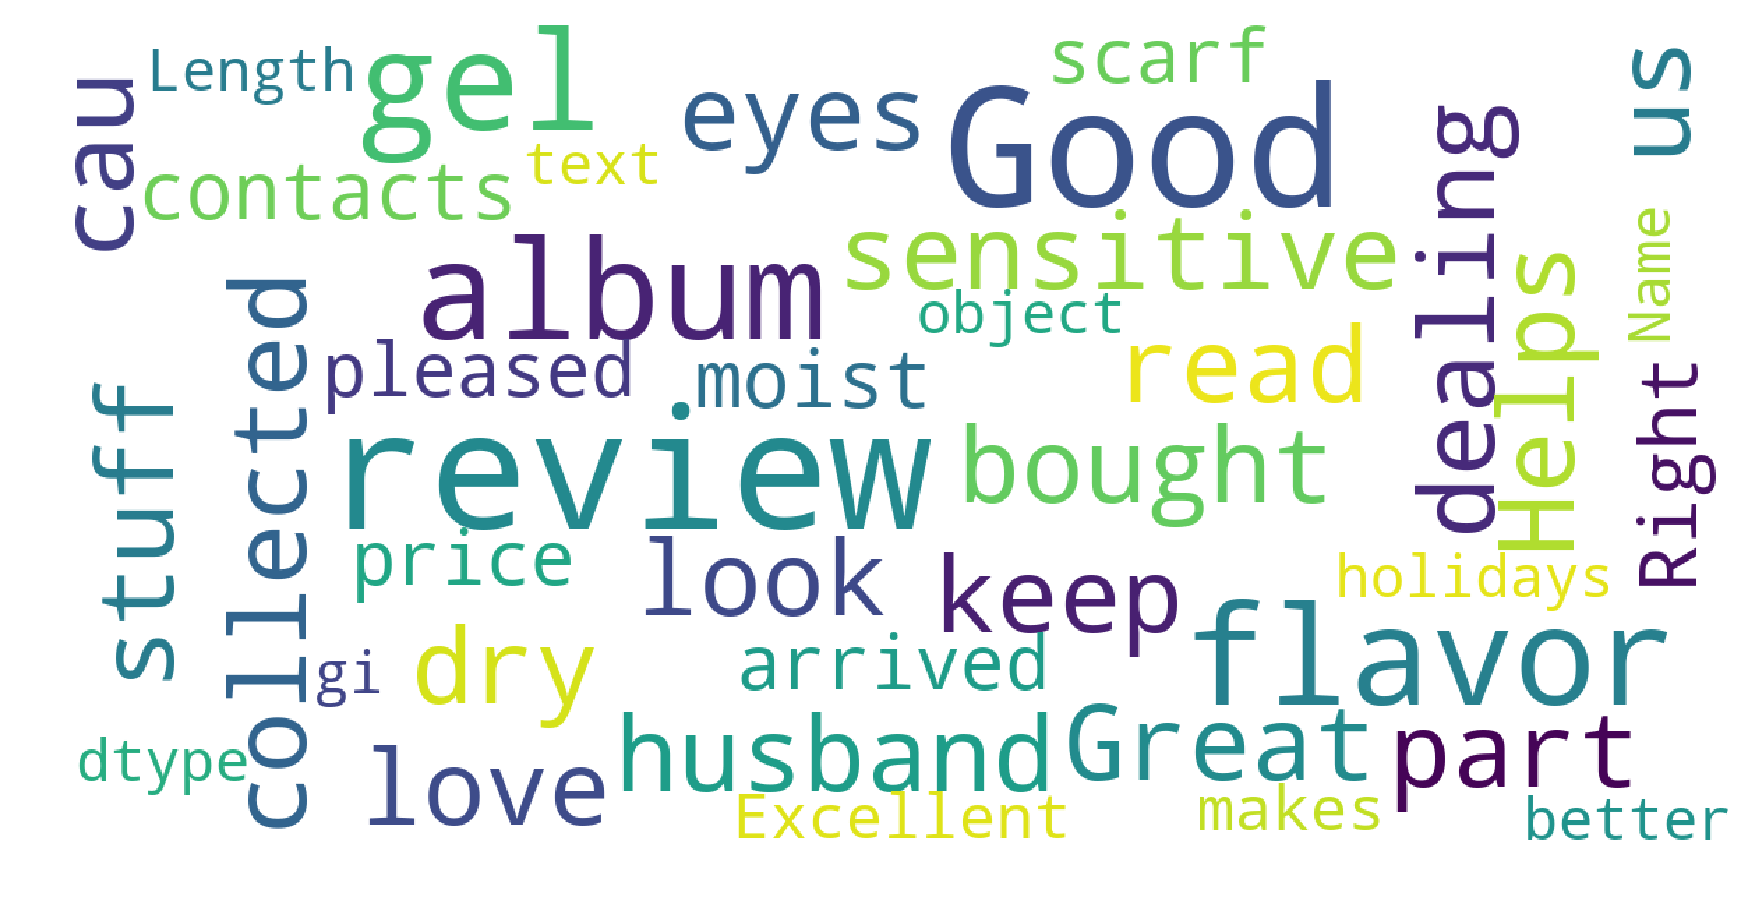

In [10]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words=300,
        max_font_size=40,
        scale=3,
        random_state=1 ).generate(str(data))
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.subtitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df['reviews.text'])    

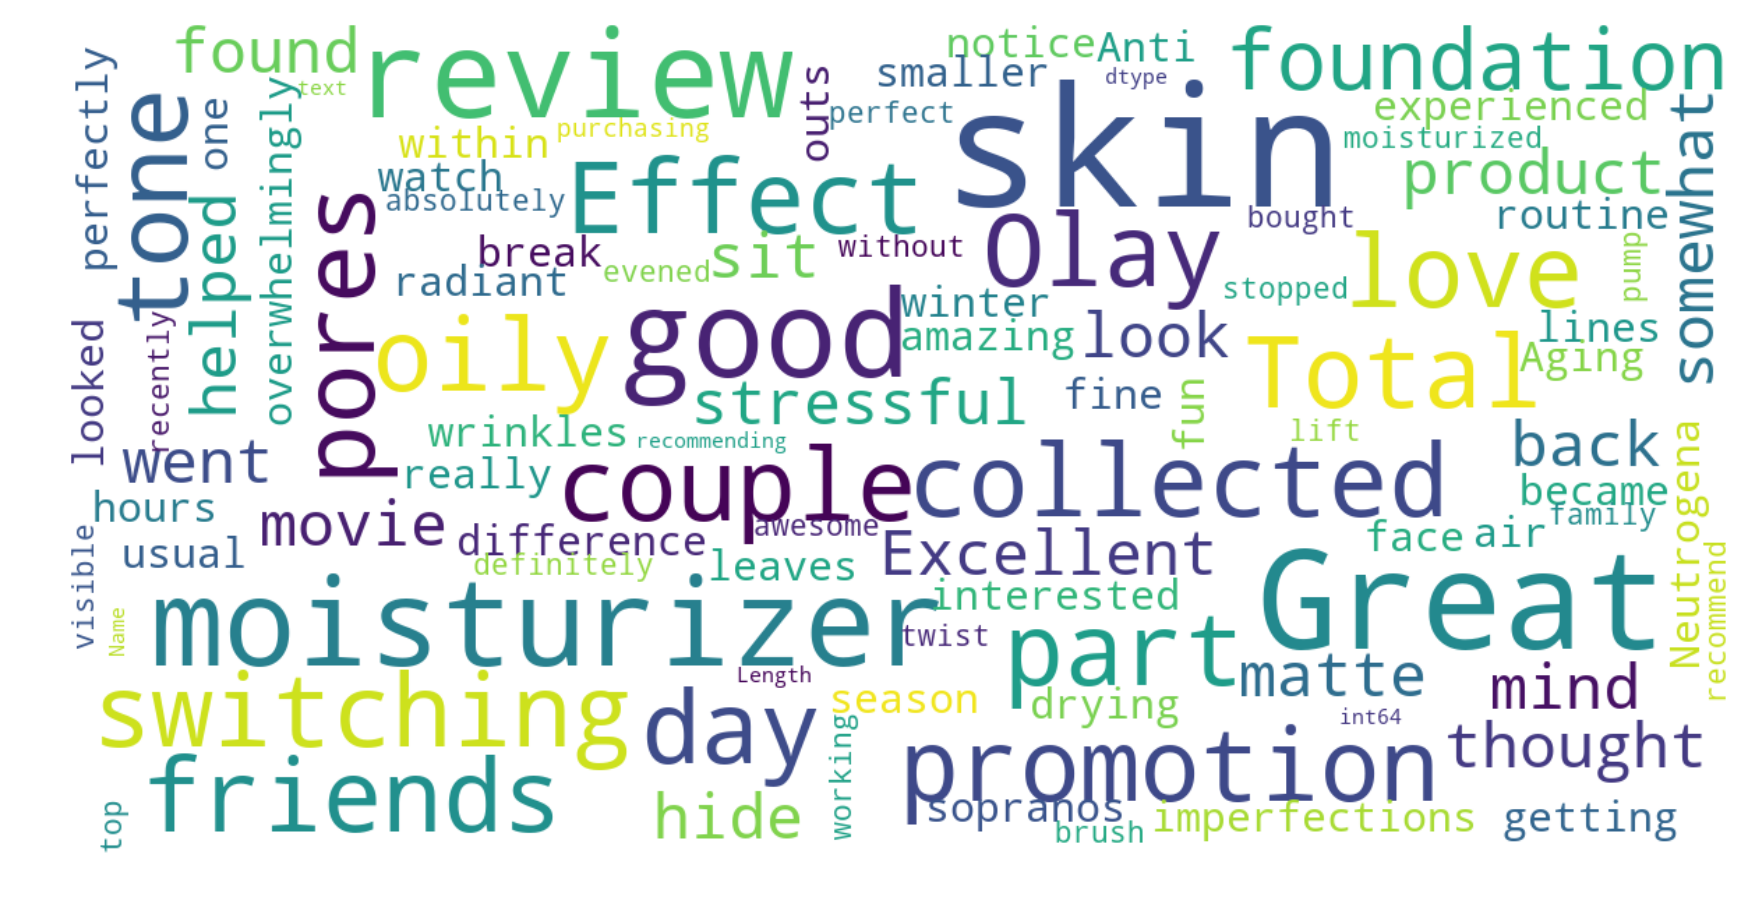

In [11]:
#alternate code, seems to u=yeild diffent results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40,
                     scale=3, random_state=1).generate(str(df['reviews.text'].value_counts()))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
df['reviews.title'].value_counts()

Great movie                                          1367
Good movie                                            700
Great Product                                         585
Great Movie                                           559
Great                                                 466
                                                     ... 
I love Godzilla originals, this falls a bit short       1
Amazing Formula!                                        1
Better than the 98 version                              1
Good smell, horrible package!                           1
Why Why Why                                             1
Name: reviews.title, Length: 42668, dtype: int64

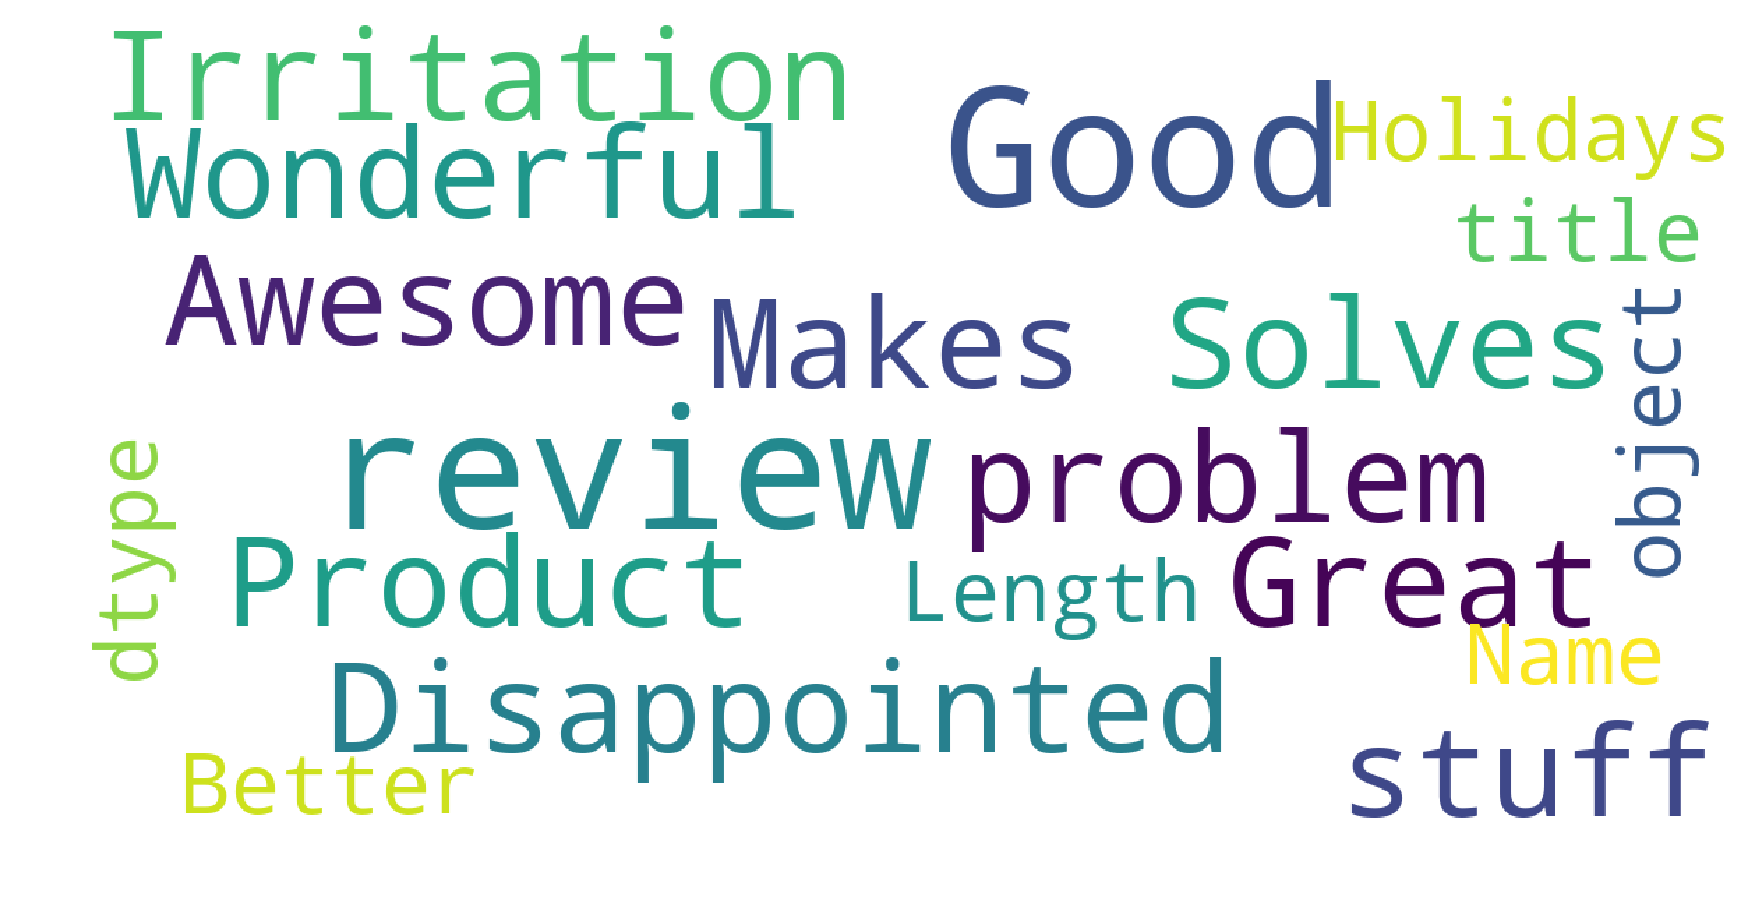

In [13]:
show_wordcloud(df['reviews.title'])


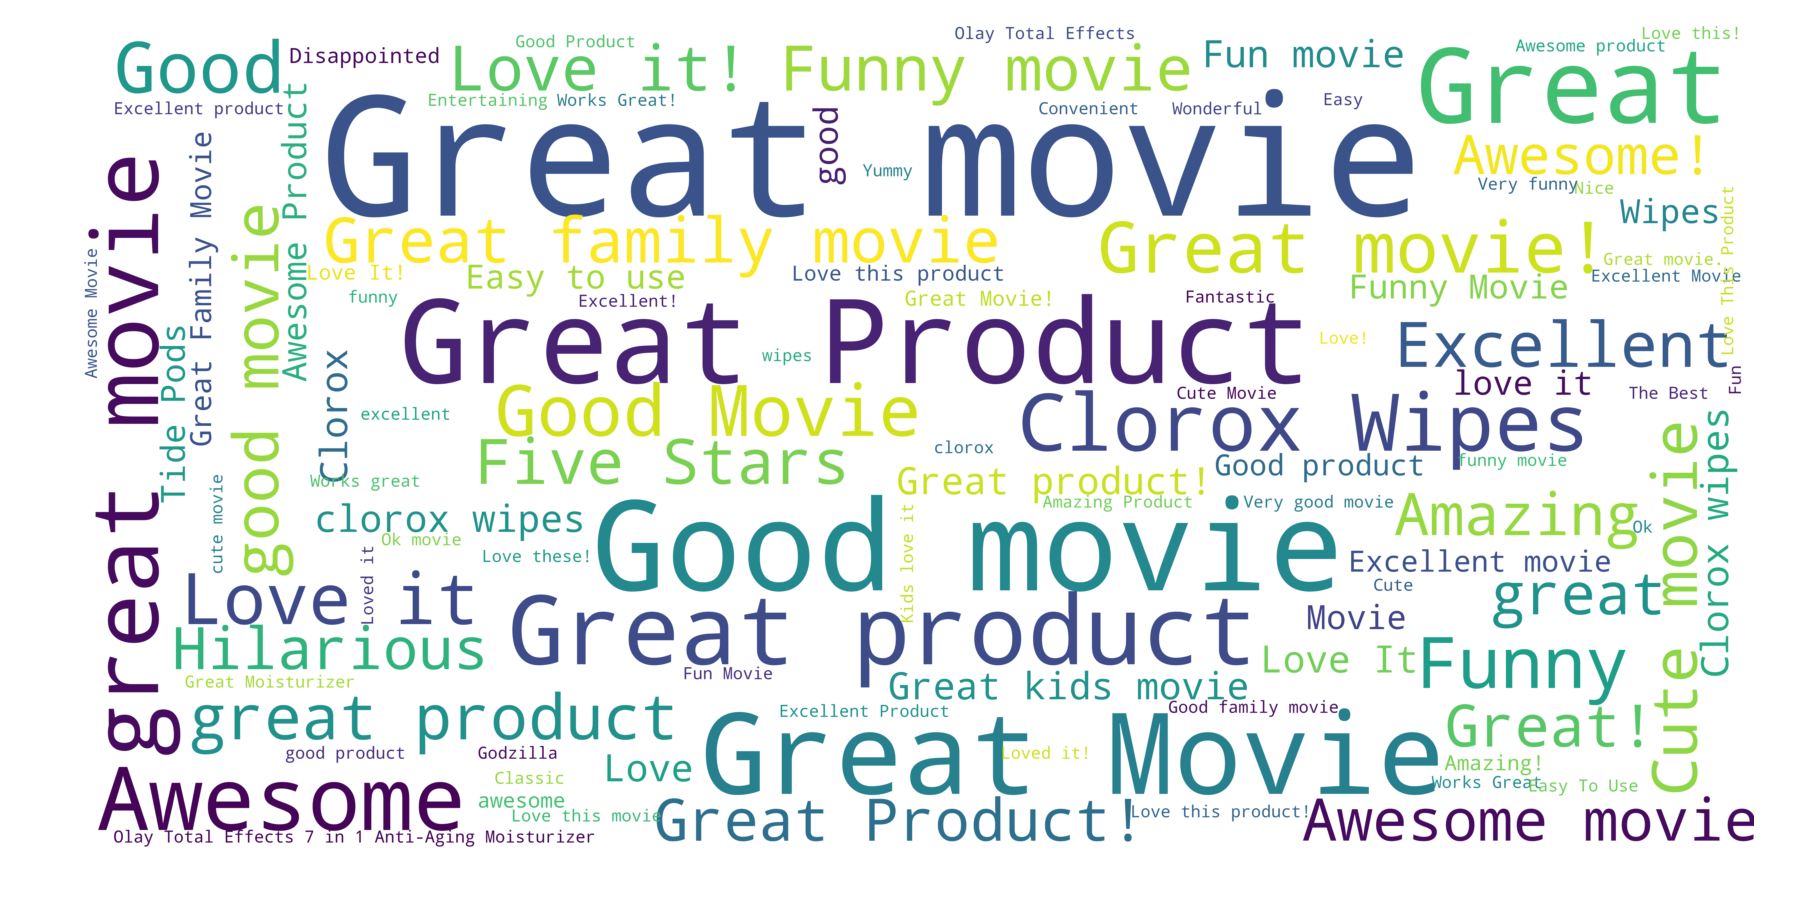

In [14]:
#alternate code, semms to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=400, max_font_size=
                     40, scale=30, random_state=1).generate_from_frequencies((df['reviews.title'].value_counts()))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

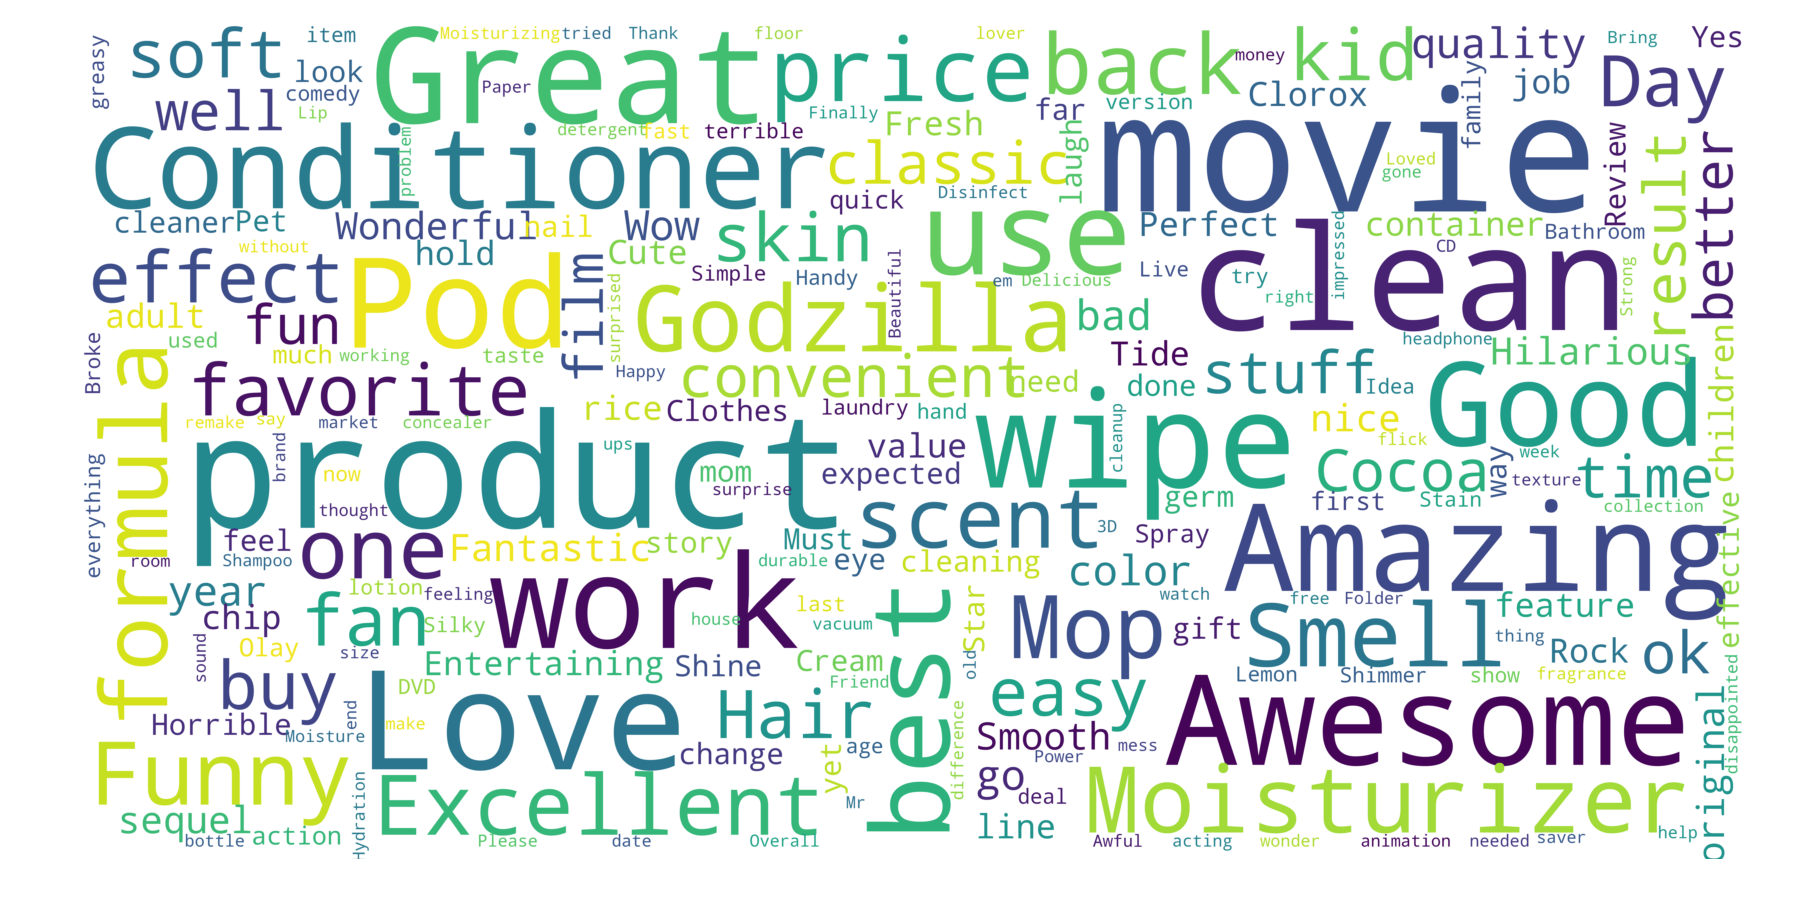

In [15]:
# try to tokenize to individual word (uni-gram) - reviews.title
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['reviews.title'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
len(big_list) #reveiws.title

232473

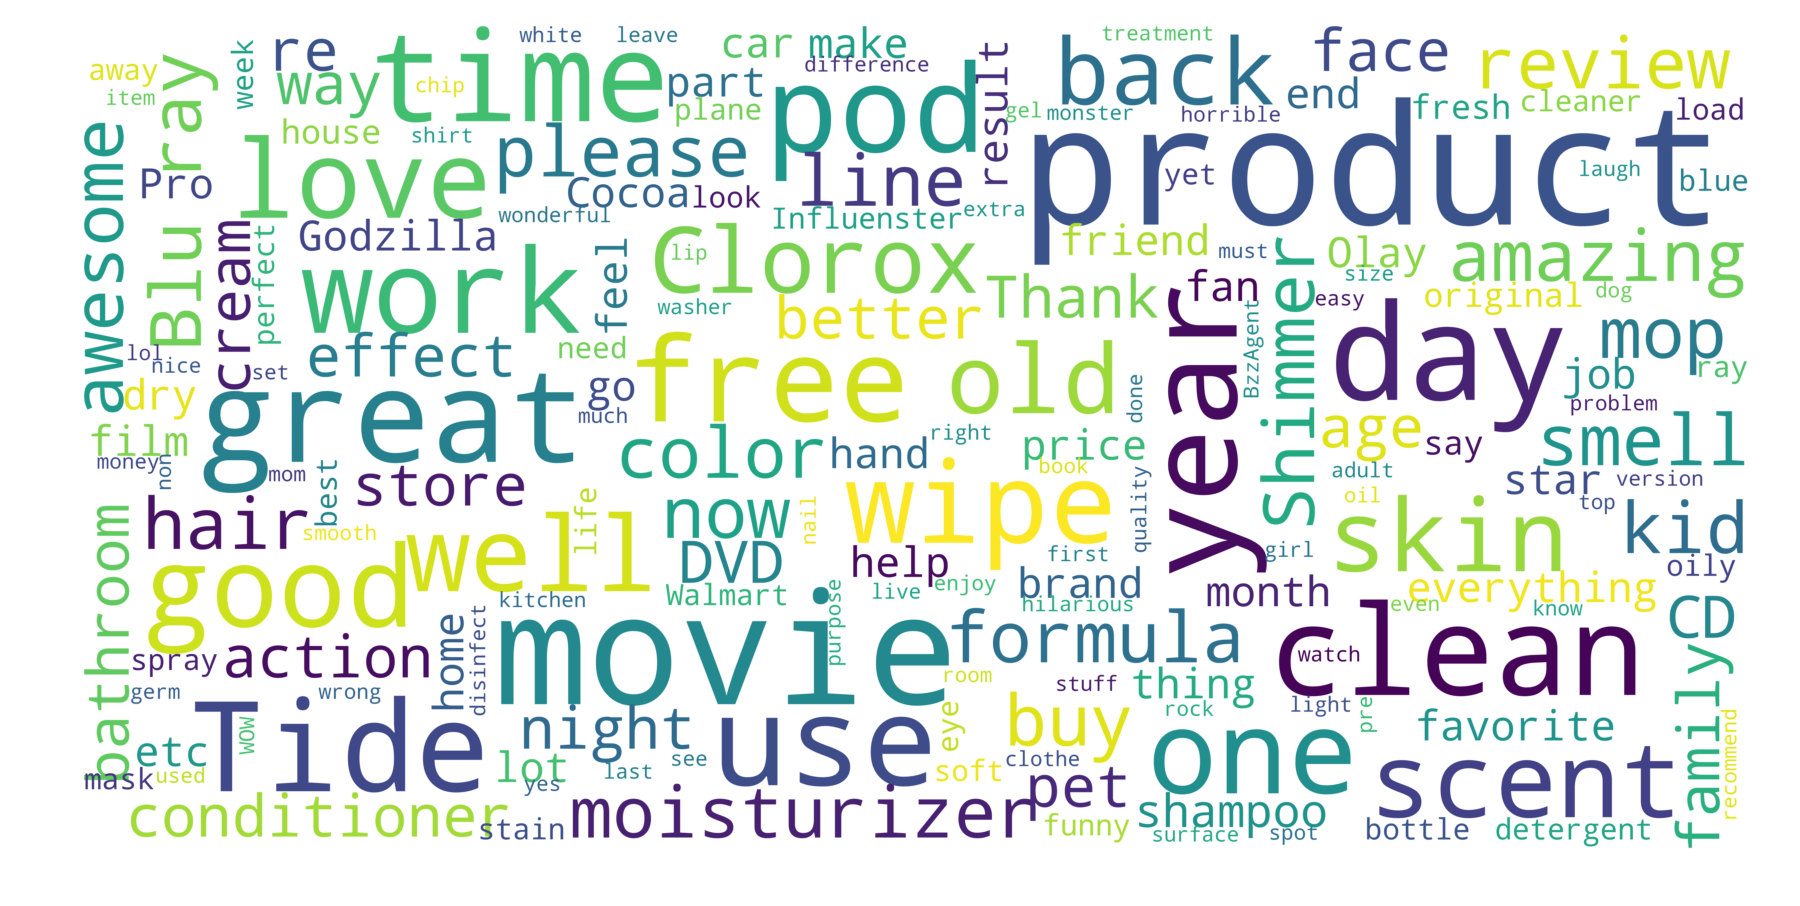

In [17]:
# try to tokenize to individual word (uni-gram) - reviews.text
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['reviews.text'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
len(big_list) #reviews.text

2801005

In [19]:
#let's see what are the popular categories, looks quite messy
df['categories'].value_counts()

Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners    8606
Featured Brands,Character Shop,The Secret Life Of Pets,Movies, Music & Books,Movies,Kids' & Family,Movies & TV,4K Ultra HD Movies,Movies & Music,Movies & TV Shows,Blu-ray                                                                                                                                                                                                                                                                                                              5510
Movies, Music & Books,Movies,Action & Adventur

In [20]:
#Let's see which are the popular products review
df['name'].value_counts()

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total          8606
The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital)               5510
Independence Day Resurgence (4k/uhd + Blu-Ray + Digital)           3609
Tide Original Liquid Laundry Detergent - 100 Oz                    3498
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd    3330
                                                                   ... 
Sunflower Swag With Metal Frame - Nearly Natural                      1
Healthy Skoop Organic Protein Powder - Chocolate - 15.9oz             1
Kenroy Home Table Lamp - Chrome                                       1
Klondike Choco Tacos Original                                         1
Who Is Harry Nilsson (and Why Is Ever (dvd)                           1
Name: name, Length: 598, dtype: int64

<h2>DO review come from shoppers who did purchase the products


In [21]:
#on the reviews.didpurchase column, replace 38,886 null filds with "Null"
df['reviews.didPurchase'].fillna('Null', inplace=True)

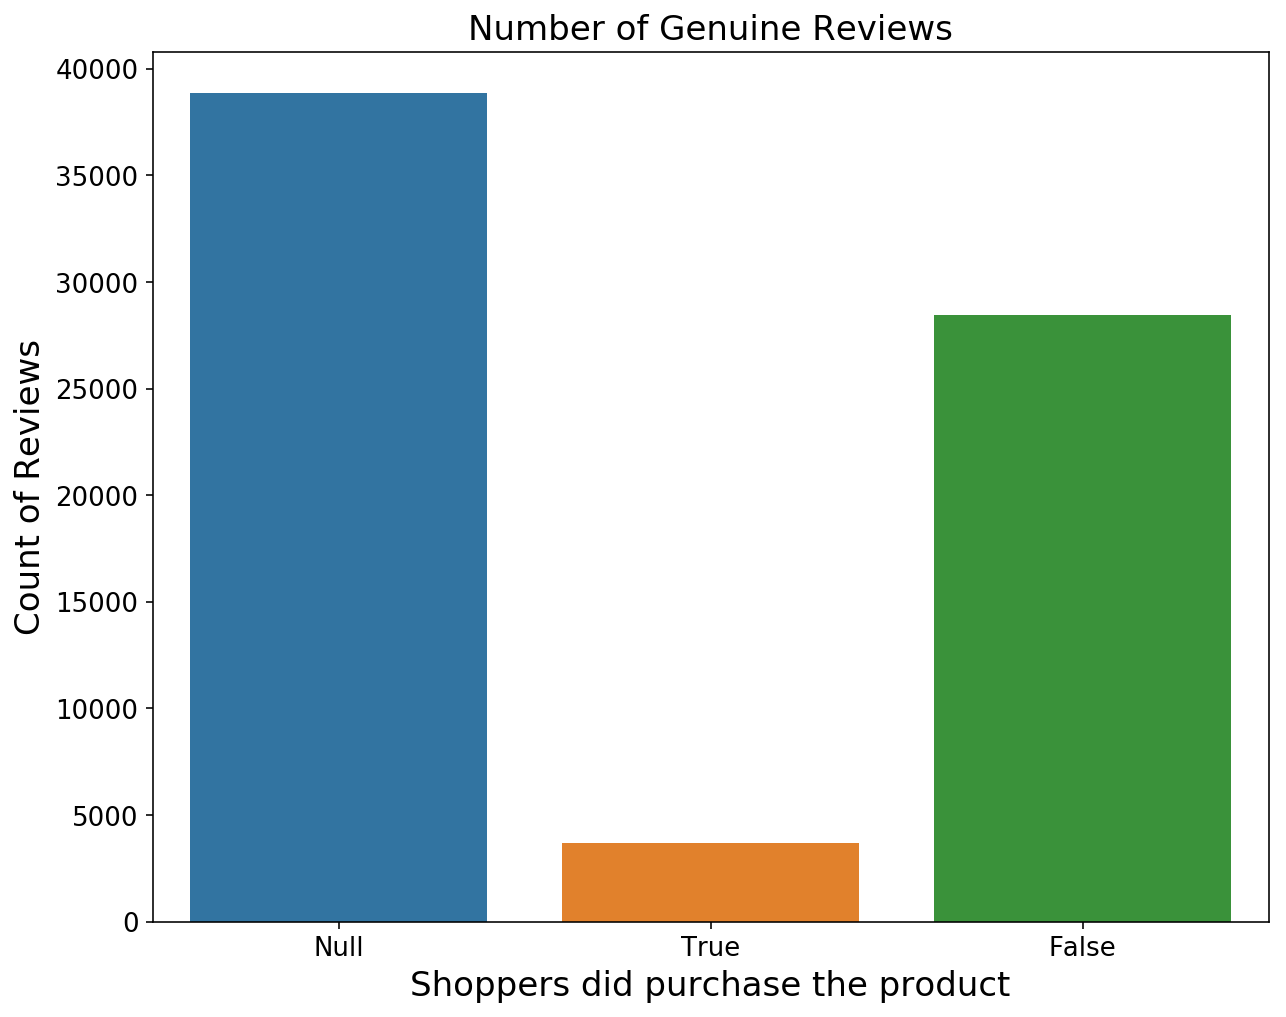

In [22]:
plt.figure(figsize=(10,8))
ax = sns.countplot(df['reviews.didPurchase'])
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of Genuine Reviews', fontsize=17)
ax.tick_params(labelsize=13)


In [23]:
df['reviews.didPurchase'].value_counts()

Null     38852
False    28474
True      3682
Name: reviews.didPurchase, dtype: int64

In [24]:
#shoppers who did purchase the product and provided the reveiw = 5%
3681/70008

0.05257970517655125

<h2> visualize the correlation map

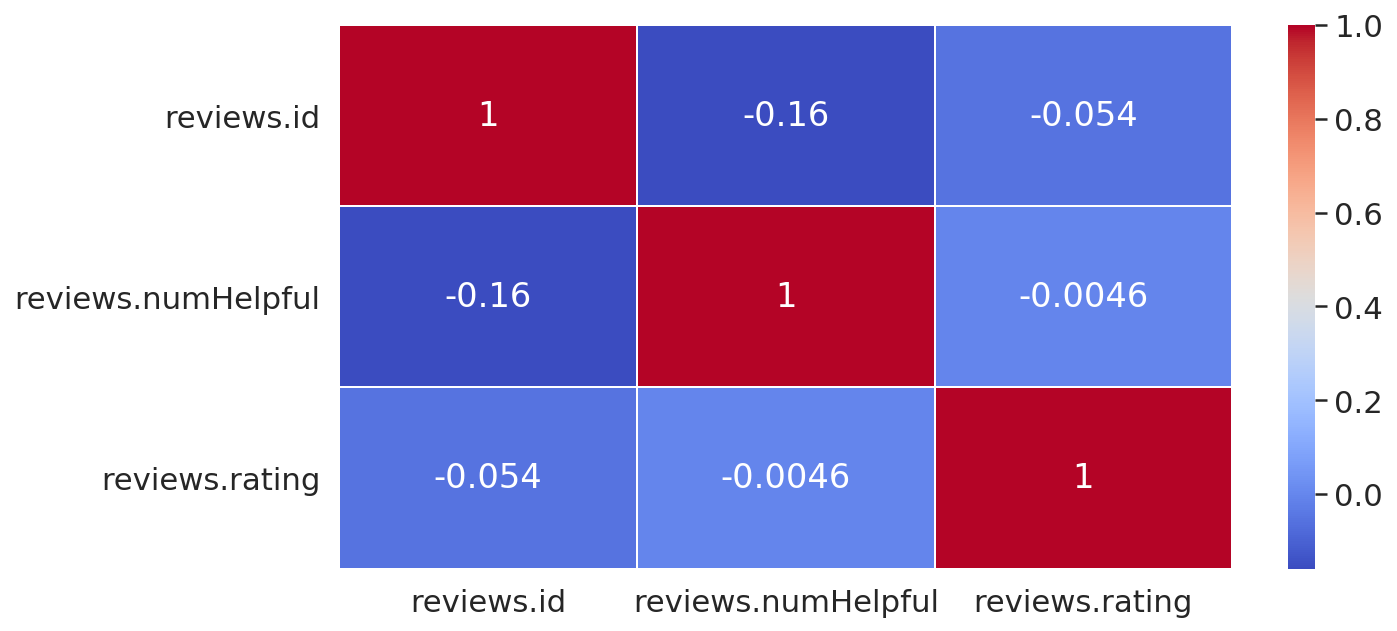

In [25]:
#not much info int the correlation map
sns.set(font_scale=1.4)
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidths=.5)

<h2> Which is the most popular product purchased?

In [26]:
df1 = df[df['reviews.didPurchase'] == True]
df1['name'].value_counts()

The Foodsaver174 10 Cup Fresh Container - Fac10-000                      477
Pantene Airspray Hairspray - 7 Oz                                        443
Hormel Chili, No Beans                                                    91
Coty Airspun Face Powder, Translucent Extra Coverage                      88
Just For Men Brush-In Color Gel For Mustache & Beard, Dark Brown M-45     80
                                                                        ... 
Australian Gold Lotion SPF 50 Baby                                         1
Northwest Black Glass Panel Electric Fireplace Wall Mount Remote           1
Suave Professionals Hair Conditioner, Sleek                                1
Adesso Oslo Floor Lamp - White                                             1
Ust 30-Day Duro Lantern, Titanium                                          1
Name: name, Length: 304, dtype: int64

The Foodsver174 10 cup fresh container is purchased almost 500 times

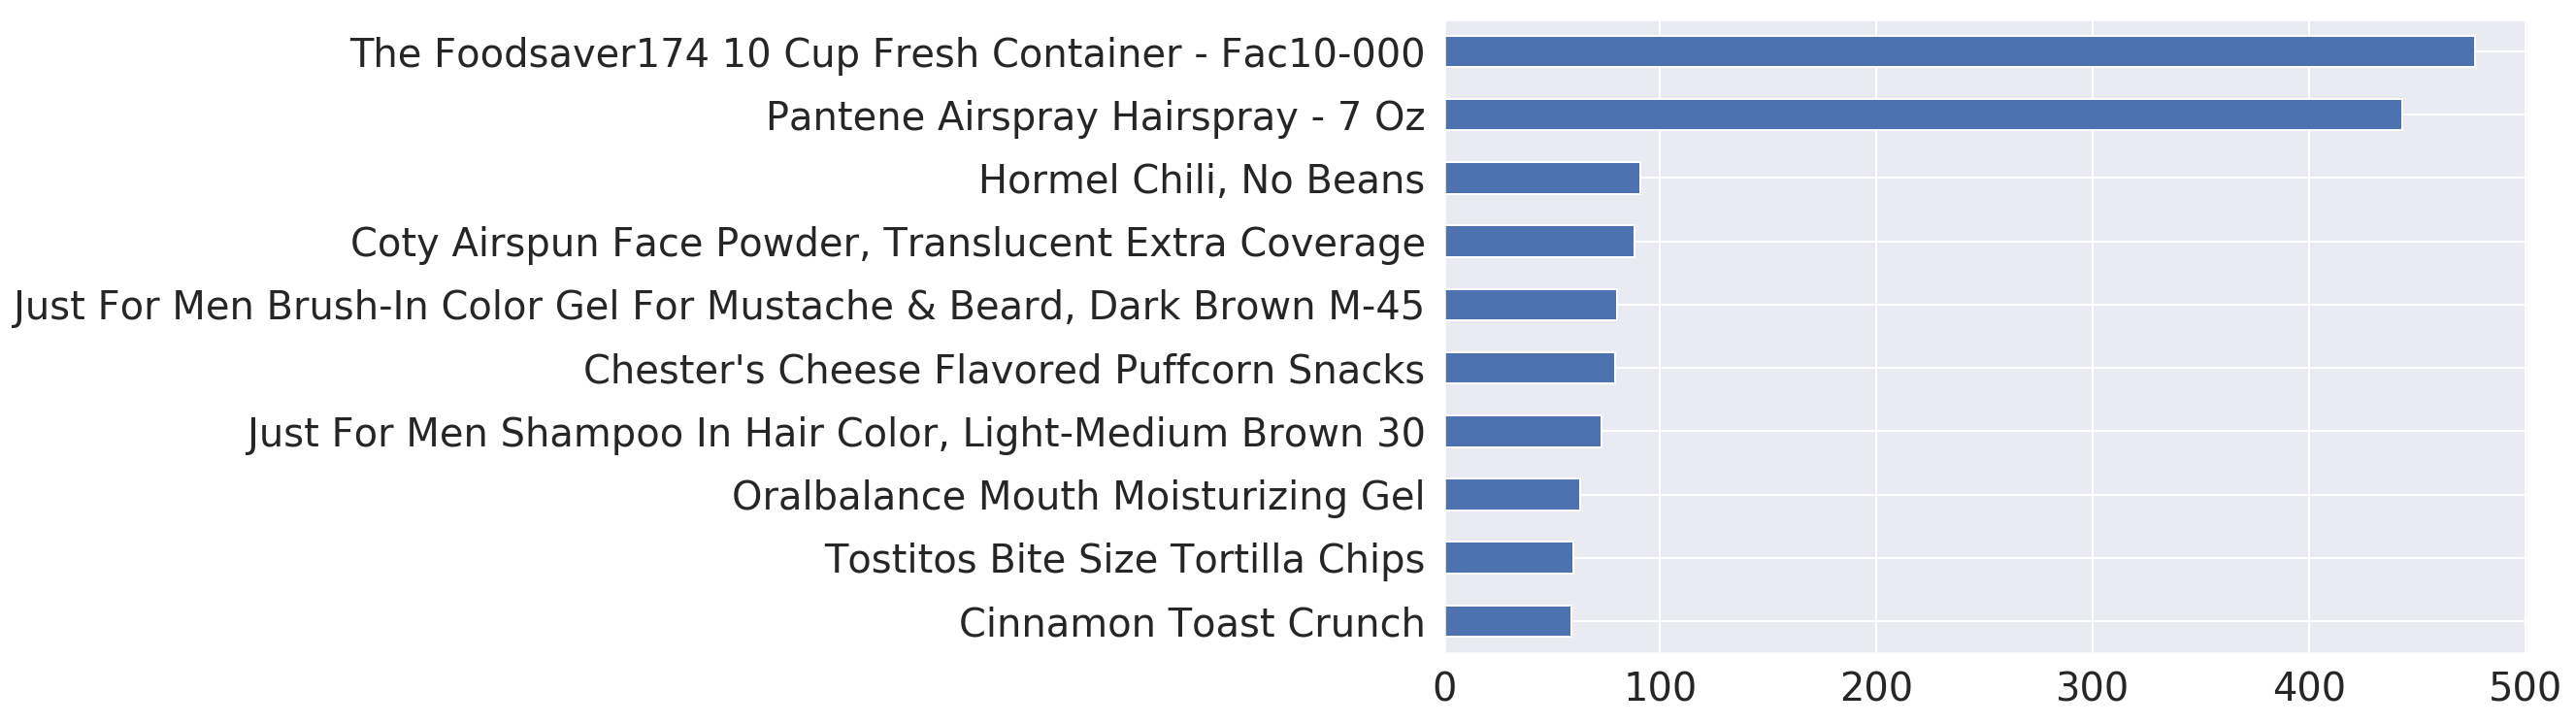

In [27]:
df1['name'].value_counts()[0:10].plot('barh', figsize=[10,6], fontsize=20).invert_yaxis()

In [28]:
# filter most purchased product with 5 star rating
df1 = df1[df1['name'] == 'The Foodsaver174 10 Cup Fresh Container - Fac10-000']
df1 = df1[df1['reviews.rating']==5]
# keep relevant columns only
df1 = df1[[ 'reviews.rating', 'reviews.text']]
df1

reviews.rating                                       reviews.text
46943               5  I love the fact you can see what is inside, ea...
46944               5  I have used my foodsaver container over and ov...
46945               5  I bought this set as well as the 10 cup contai...
46946               5  I have had a chance to use these for a while. ...
46947               5  My veggie's stayed good for two weeks! Overall...
...               ...                                                ...
47342               5  The best buy since we got our 3rd FoodSaver. H...
47343               5  All the FoodSaver products I have purchased ar...
47344               5  I've been using these containers since they we...
47345               5  Haven't had a chance to use them yet, but I be...
47347               5  My fresh fruits and veggies last so much longe...

[354 rows x 2 columns]

<h2> predictions of ratings<h2>

In [29]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

all_text = df['reviews.text']
y = df['reviews.rating']

<h2> Uaing the n-gram tfidf vectorizer

In [30]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3) )  # try 1,3
#     max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(all_text)

In [31]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(all_text)

train_features = hstack([train_char_features, train_word_features])

In [32]:
import time 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
seed = 71

X_train, X_test, y_train, y_test = train_test_split(train_features, y, test_size=0.3, random_state=seed)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (49705, 1346053)
y_train (49705,)
X_test (21303, 1346053)
y_test (21303,)


<h2> Model 1: Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
time1 = time.time()
classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=seed, n_jobs=-1)
classifier.fit(X_train, y_train)
preds1 = classifier.predict(X_test)

time_taken = time.time() -time1
print('Time taken: {:.2f} seconds'.format(time_taken))

Time taken: 597.75 seconds


In [34]:
print("Random Forest Model accuracy", accuracy_score(preds1, y_test))
print(classification_report(preds1, y_test))
print(confusion_matrix(preds1, y_test))

Random Forest Model accuracy 0.7160963244613435
              precision    recall  f1-score   support

           1       0.42      0.90      0.57       522
           2       0.18      0.99      0.31       101
           3       0.11      0.94      0.20       157
           4       0.15      0.73      0.24       860
           5       0.99      0.71      0.83     19663

    accuracy                           0.72     21303
   macro avg       0.37      0.85      0.43     21303
weighted avg       0.94      0.72      0.79     21303

[[  470    30    14     5     3]
 [    1   100     0     0     0]
 [    1     2   147     6     1]
 [    7    21   131   626    75]
 [  653   397  1021  3680 13912]]


In [35]:
# n_estimators=None

# Random Forest Model accuracy 0.7014504999295874
#               precision    recall  f1-score   support

#            1       0.52      0.74      0.61       784
#            2       0.16      0.79      0.27       120
#            3       0.16      0.51      0.24       419
#            4       0.25      0.46      0.33      2412
#            5       0.93      0.74      0.82     17568

#    micro avg       0.70      0.70      0.70     21303
#    macro avg       0.41      0.65      0.45     21303
# weighted avg       0.82      0.70      0.74     21303

# [[  578    74    37    40    55]
#  [   14    95     4     1     6]
#  [   23    36   212    94    54]
#  [   73    84   316  1114   825]
#  [  426   288   772  3138 12944]]

In [36]:
# n_estimators=300 
# Time Taken:  955
# Random Forest Model accuracy 0.7151105478101676
#               precision    recall  f1-score   support

#            1       0.41      0.90      0.56       510
#            2       0.18      1.00      0.31        99
#            3       0.11      0.95      0.19       150
#            4       0.14      0.74      0.24       826
#            5       0.99      0.71      0.83     19718

#    micro avg       0.72      0.72      0.72     21303
#    macro avg       0.37      0.86      0.42     21303
# weighted avg       0.94      0.72      0.79     21303

# [[  460    31    12     4     3]
#  [    0    99     0     0     0]
#  [    1     1   142     5     1]
#  [    8    16   122   613    67]
#  [  663   403  1037  3695 13920]]

<h2> Model2 : XGBoost

In [37]:
import xgboost as xgb
time1 = time.time()

xgb = xgb.XGBClassifier(n_jobs=1)
xgb.fit(X_train, y_train)
preds2 = xgb.predict(X_test)

time_taken = time.time() - time1
print('Time taken: {:.2f} seconds'.format(time_taken))

Time taken: 4196.13 seconds


In [38]:
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#        colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
#        max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
#        n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
#        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#        silent=True, subsample=1)

# time taken 2410

In [39]:
# manual method to check accuracy, see first 100 predictions, around 70% correct prediction
for i in range(100):
    if preds2[i] == np.array(y_test)[i]:
        print('1', end=', ')   # correct prediction
    else:
        print('0', end=', ')   # wrong prediction

1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 

In [40]:
# manual method to check accuracy, see some prediction of rating
preds2[0:100: 5]

array([5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 1])

In [41]:
# manual method to check accuracy, see correct test label
np.array(y_test)[0:100: 5]

array([5, 5, 5, 3, 1, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 1])

In [42]:
#manuel method to check accuray, check on all 21303 test data set
correct = 0
wrong = 0
for i in range(21303):
    if preds2[i] == np.array(y_test)[i]:
        correct += 1
    else:
        wrong += 1
print(correct+wrong)
print(correct/21303)

21303
0.7003238980425293


In [43]:
print("XGBoost Model accuracy", accuracy_score(preds2, np.array(y_test)))

XGBoost Model accuracy 0.7003238980425293


In [44]:
print("XGBoost Model accuracy", accuracy_score(preds2, y_test))
print(classification_report(preds2, y_test))
print(confusion_matrix(preds2, y_test))

XGBoost Model accuracy 0.7003238980425293
              precision    recall  f1-score   support

           1       0.43      0.76      0.55       645
           2       0.02      0.54      0.05        24
           3       0.09      0.54      0.16       220
           4       0.13      0.48      0.21      1175
           5       0.98      0.71      0.83     19239

    accuracy                           0.70     21303
   macro avg       0.33      0.61      0.36     21303
weighted avg       0.91      0.70      0.78     21303

[[  488    74    41    24    18]
 [    7    13     1     3     0]
 [   12    25   119    50    14]
 [   38    72   273   566   226]
 [  587   366   879  3674 13733]]


<h2> Model3: Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score


In [46]:
time1 = time.time()
logit = LogisticRegression(C=1, multi_class = 'ovr')
logit.fit(X_train, y_train)
preds3 = logit.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 109.01 seconds


In [47]:
print("Logistic Regression accuracy", accuracy_score(preds3, y_test))
print(classification_report(preds3, y_test))
print(confusion_matrix(preds3, y_test))

Logistic Regression accuracy 0.7328545275313336
              precision    recall  f1-score   support

           1       0.65      0.75      0.70       973
           2       0.08      0.75      0.14        56
           3       0.18      0.54      0.27       445
           4       0.26      0.51      0.34      2210
           5       0.96      0.76      0.85     17619

    accuracy                           0.73     21303
   macro avg       0.43      0.66      0.46     21303
weighted avg       0.86      0.73      0.78     21303

[[  734   127    59    30    23]
 [    8    42     4     1     1]
 [   32    62   241    85    25]
 [   46   109   458  1125   472]
 [  312   210   551  3076 13470]]


<h2> Which one is better Bagging or Boosting
<h3> Deep learning
To clssify ratings < 4 as sentiment, replace rating less than 4 as not happy
label 1 = happy
label 2 = uhappy

In [48]:
df['sentiment'] = df['reviews.rating'] < 4
from sklearn.model_selection import train_test_split
train_text, test_text, train_y, test_y = train_test_split(df['reviews.text'],df['sentiment'], test_size=0.2)

In [49]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam

Using TensorFlow backend.


In [50]:
MAX_NB_WORDS = 20000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 26330 unique tokens.


In [51]:
MAX_SEQUENCE_LENGTH = 200
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (56806, 200)
Shape of data test tensor: (14202, 200)


In [52]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model.add(Dense(1, activation='sigmoid'))

In [53]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [54]:
model.fit(x_train, train_y,
          batch_size=128,
          epochs=10,
          validation_data=(x_test, test_y))

Train on 56806 samples, validate on 14202 samples
Epoch 1/10
56806/56806 [==============================] - 305s 5ms/step - loss: 0.2735 - accuracy: 0.8947 - val_loss: 0.2202 - val_accuracy: 0.9166
Epoch 2/10
56806/56806 [==============================] - 310s 5ms/step - loss: 0.1975 - accuracy: 0.9264 - val_loss: 0.2140 - val_accuracy: 0.9181
Epoch 3/10
56806/56806 [==============================] - 300s 5ms/step - loss: 0.1687 - accuracy: 0.9390 - val_loss: 0.2232 - val_accuracy: 0.9215
Epoch 4/10
56806/56806 [==============================] - 304s 5ms/step - loss: 0.1463 - accuracy: 0.9476 - val_loss: 0.2304 - val_accuracy: 0.9144
Epoch 5/10
56806/56806 [==============================] - 308s 5ms/step - loss: 0.1264 - accuracy: 0.9552 - val_loss: 0.2590 - val_accuracy: 0.9182
Epoch 6/10
56806/56806 [==============================] - 306s 5ms/step - loss: 0.1138 - accuracy: 0.9603 - val_loss: 0.2427 - val_accuracy: 0.9178
Epoch 7/10
56806/56806 [==============================] - 305s